In [643]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
import seaborn as sns
from sklearn.metrics import recall_score, precision_score

In [644]:
df = pd.read_csv('/content/sample_data/bank-additional-full.csv', delimiter=';', na_values='?')

# Exploratory Data Analysis

In [645]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [646]:
print(df.shape)
print(df.isnull().sum())

(41188, 21)
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [647]:
df = df.rename(columns={'default': 'creditDefault', 'housing': 'houseLoan', 'loan':'personalLoan', 'contact': 'contactType',
                       'month': 'contactMonth', 'day': 'contactDay', 'duraction':'contactDuration', 'emp.var.rate':'emp_var_rate',
                        'cons.conf.idx':'con_confi_idx','cons.price.idx':'cons_price_idx','nr.employed':'noOfEmployee','y':'target'})

In [648]:
cat_columns = df.select_dtypes(include=object).columns
num_columns = df.select_dtypes(exclude=object).columns
print(f'Total number of categorical features: {len(cat_columns)} \n')
print(f'Total number of categorical features: {len(num_columns)} \n')

Total number of categorical features: 11 

Total number of categorical features: 10 



**Lets Get Unique value and its count for each Categorical Features.**

In [649]:
for column in cat_columns:
    print(column)
    print(df[column].value_counts())
    print()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

creditDefault
no         32588
unknown     8597
yes            3
Name: creditDefault, dtype: int64

houseLoan
yes        21576
no         18622
unknown      990
Name: houseLoan, dtype: int64

personalLoan
no         33950
yes         6248
unknown      990
Name: personalLoan, dtype: int64

contactType
cellular   

Numerical Features Insights:

<Axes: >

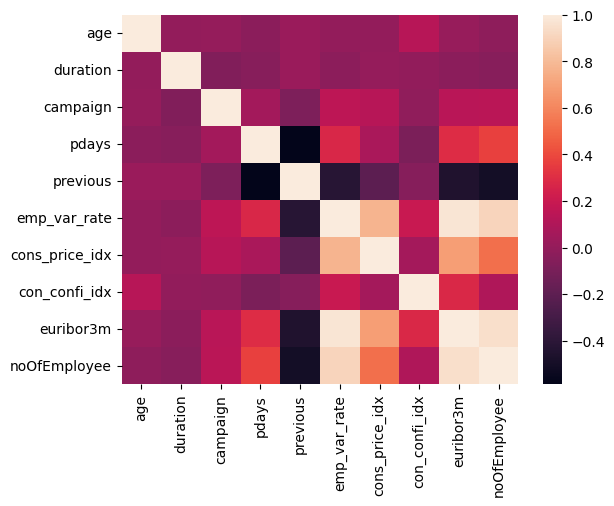

In [650]:
sns.heatmap(df[num_columns].corr())

3 columns i.e euribor3m, nr.employed, emp.var.rate are highly correlated, we can drop 2 of these 3. we will drop the ones, with least statistical significance.

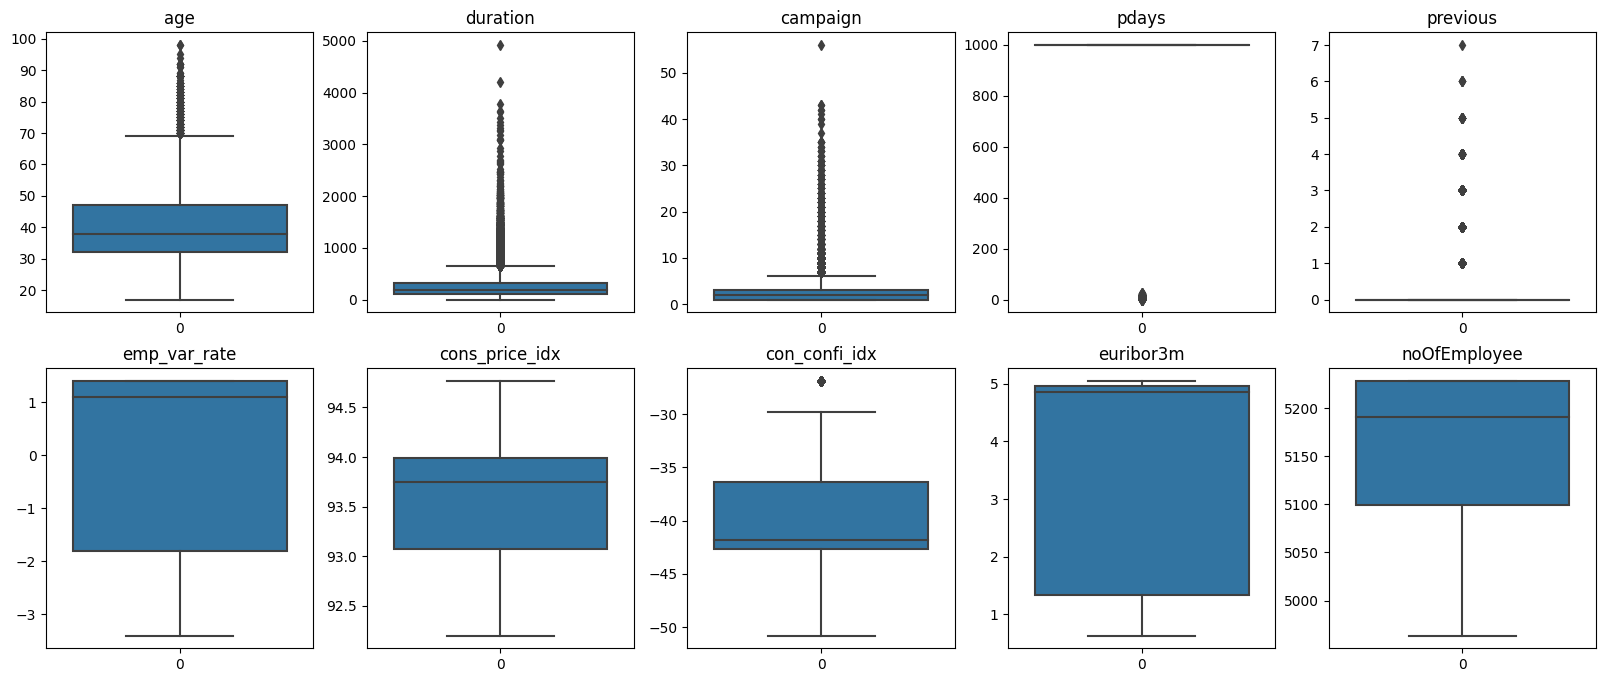

In [651]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i, column in enumerate(num_columns):
    sns.boxplot(df[column], ax=axes[i])
    axes[i].set_title(column)
plt.show()

here we observe age, duration, campaign have outliers

In [652]:
dup_rows = df[df.duplicated()]
dup_rows

,age,job,marital,education,creditDefault,houseLoan,personalLoan,contactType,contactMonth,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,con_confi_idx,euribor3m,noOfEmployee,target
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [653]:
df[df['target'] == 'yes']['duration'].describe()

count    4640.000000
mean      553.191164
std       401.171871
min        37.000000
25%       253.000000
50%       449.000000
75%       741.250000
max      4199.000000
Name: duration, dtype: float64

In [654]:
df[df['target'] == 'no']['duration'].describe()

count    36548.000000
mean       220.844807
std        207.096293
min          0.000000
25%         95.000000
50%        163.500000
75%        279.000000
max       4918.000000
Name: duration, dtype: float64

In [655]:
df[df['target'] == 'yes']['age'].describe()

count    4640.000000
mean       40.913147
std        13.837476
min        17.000000
25%        31.000000
50%        37.000000
75%        50.000000
max        98.000000
Name: age, dtype: float64

In [656]:
df[df['target'] == 'no']['age'].describe()

count    36548.000000
mean        39.911185
std          9.898132
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         95.000000
Name: age, dtype: float64

In [657]:
df['duration'].value_counts().sort_index()

0        4
1        3
2        1
3        3
4       12
        ..
3631     1
3643     1
3785     1
4199     1
4918     1
Name: duration, Length: 1544, dtype: int64

Above Numerical Features have outliers as it values and highly skewed.

# Preprocessing

Drop Duplicate records

In [658]:
df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

**Statistical Tests**

Categorical Features

In [659]:
from scipy.stats import chi2_contingency

significant_columns = []
for column in cat_columns:
    contigency = pd.crosstab(df['target'], df[column])
    contigency
    c, p, dof, exp = chi2_contingency(contigency)
    if p < .05:
        significant_columns.append(column)
    print(column, p)

job 3.2684116066165443e-199
marital 1.778422500461116e-26
education 3.746768377534744e-38
creditDefault 5.2175408937279634e-89
houseLoan 0.05663792749452545
personalLoan 0.5771532081176227
contactType 1.7187406241263769e-189
contactMonth 0.0
day_of_week 3.085754965631736e-05
poutcome 0.0
target 0.0


Here we observe loan and housing are not showing any significant relation with our response variable, so we can drop those.

In [660]:
drop_columns = []
drop_columns.append('houseLoan')
drop_columns.append('personalLoan')

**Numerical Features:**

In [661]:
num_cols = df.select_dtypes(exclude = object).columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'con_confi_idx', 'euribor3m', 'noOfEmployee'],
      dtype='object')

lets test with linear regression as well

In [662]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

In [663]:
x = df.copy()

In [664]:
import statsmodels.api as sm

# Fit the linear regression model (using statsmodel since sklearn doesn't provide p-values)
model = sm.OLS(x['target'], x[num_columns]).fit()

coefficients = model.params
p_values = model.pvalues
feature_names = x[num_columns].columns

In [665]:
results = pd.DataFrame({
    'Coefficient': coefficients,
    'P-value': p_values
})

print(results)

                Coefficient        P-value
age                0.000318   1.042997e-02
duration           0.000468   0.000000e+00
campaign           0.001187   1.166794e-02
pdays             -0.000373   0.000000e+00
previous          -0.029741   8.408802e-18
emp_var_rate      -0.034340   4.732106e-15
cons_price_idx     0.049253  9.154450e-126
con_confi_idx      0.005530   9.011970e-58
euribor3m         -0.000385   9.360386e-01
noOfEmployee      -0.000782   2.002537e-82


In [666]:
drop_columns.append('emp_var_rate')
drop_columns.append('euribor3m')

All columns looks significant, since the t_statistic of noOfemployee is less than emp_var_rate and euribor3m, so we can drop those and keep noOfemployee

check if there is any sort of ordering in the categorical column

In [667]:
for column in cat_columns:
    print(df.groupby([column])['target'].mean().sort_values(), '\n')

job
blue-collar      0.068951
services         0.081422
entrepreneur     0.085165
housemaid        0.100000
self-employed    0.104856
technician       0.108325
unknown          0.112121
management       0.112175
admin.           0.129667
unemployed       0.142012
retired          0.252619
student          0.314286
Name: target, dtype: float64 

marital
married     0.101561
divorced    0.103231
single      0.140090
unknown     0.150000
Name: target, dtype: float64 

education
basic.9y               0.078246
basic.6y               0.082060
basic.4y               0.102490
high.school            0.108389
professional.course    0.113550
university.degree      0.137208
unknown                0.145087
illiterate             0.222222
Name: target, dtype: float64 

creditDefault
yes        0.000000
unknown    0.051536
no         0.128803
Name: target, dtype: float64 

houseLoan
unknown    0.108081
no         0.108783
yes        0.116221
Name: target, dtype: float64 

personalLoan
unknown    0.1

Binning using Weight of Evidence and Information Value

In [668]:
df['age'].describe()


count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [669]:
labels = ['17-25', '26-35', '36-45','46-60','>60']
cutPoints= [16, 25, 35, 45, 60, 90]
df['Age bracket'] = pd.cut(df['age'], cutPoints, labels = labels)

In [670]:
df_woe = pd.DataFrame(pd.pivot_table(df, index=['target'], values='age', columns=['Age bracket'], aggfunc='count', fill_value=0).T)

In [671]:
total_yes = df_woe[1].sum()
total_no = df_woe[0].sum()
df_woe['woe'] = np.log( (df_woe[1] / total_yes)  / (df_woe[0] / total_no))
df_woe['IV'] = df_woe['woe'] * ((df_woe[1] / total_yes) - (df_woe[0] / total_no))

In [672]:
df_woe

target,0,1,woe,IV
Age bracket,,,,
17-25,1316,349,0.737488,0.028976
26-35,13104,1740,0.045736,0.000768
36-45,11747,1092,-0.310819,0.026701
46-60,9875,1044,-0.182179,0.008202
>60,490,409,1.884078,0.141019


In [673]:
df_woe['IV'].sum()


0.2056647160655795

we can use this binning as this has an information value of .2, which makes our age bracket a moderate predictor

In [674]:
df[['age','Age bracket']]

,age,Age bracket
0,56,46-60
1,57,46-60
2,37,36-45
3,40,36-45
4,56,46-60
...,...,...
41183,73,>60
41184,46,46-60
41185,56,46-60
41186,44,36-45


**Ordinal Encoding:**

In [675]:
df['day_of_week'].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [676]:
df.head()


,age,job,marital,education,creditDefault,houseLoan,personalLoan,contactType,contactMonth,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,con_confi_idx,euribor3m,noOfEmployee,target,Age bracket
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,46-60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,46-60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,36-45
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,36-45
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,46-60


In [677]:
df['Age bracket'] = df['Age bracket'].astype(object)

In [678]:
df.columns
drop_columns.append('age')

In [679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   creditDefault   41176 non-null  object 
 5   houseLoan       41176 non-null  object 
 6   personalLoan    41176 non-null  object 
 7   contactType     41176 non-null  object 
 8   contactMonth    41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp_var_rate    41176 non-null  float64
 16  cons_price_idx  41176 non-null  float64
 17  con_confi_idx   41176 non-null 

In [680]:
cat_columns = df.drop(['target','personalLoan','houseLoan'], axis = 1).select_dtypes(include=object).columns
cat_columns

Index(['job', 'marital', 'education', 'creditDefault', 'contactType',
       'contactMonth', 'day_of_week', 'poutcome', 'Age bracket'],
      dtype='object')

In [681]:
df = df.drop(drop_columns, axis=1)

In [682]:
data = pd.get_dummies(df.drop('target', axis = 1), columns= cat_columns)

In [683]:
data.shape

(41176, 59)

Overall, Drop the columns on the basis of analysis and test houseLoan', 'personalLoan', 'emp_var_rate', 'euribor3m', 'age'. There are around 59 total Features.

# Visualizations

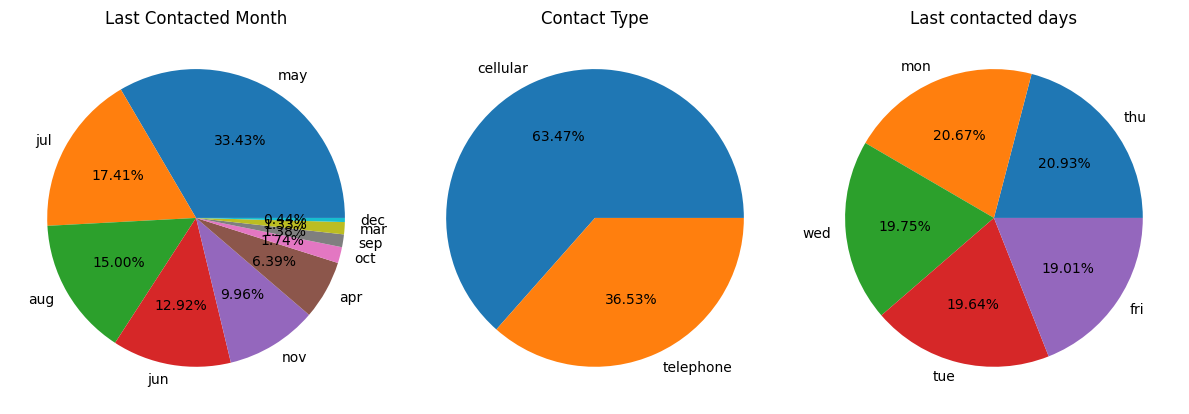

In [684]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))
day_counts = df['day_of_week'].value_counts()
type_counts = df['contactType'].value_counts()
mon_counts = df['contactMonth'].value_counts()
axes[0].pie(mon_counts, labels=mon_counts.index, autopct='%1.2f%%')
axes[0].set_title('Last Contacted Month')
axes[1].pie(type_counts, labels=type_counts.index, autopct='%1.2f%%')
axes[1].set_title('Contact Type')
axes[2].pie(day_counts, labels=day_counts.index, autopct='%1.2f%%')
axes[2].set_title('Last contacted days')
plt.tight_layout()
plt.show()

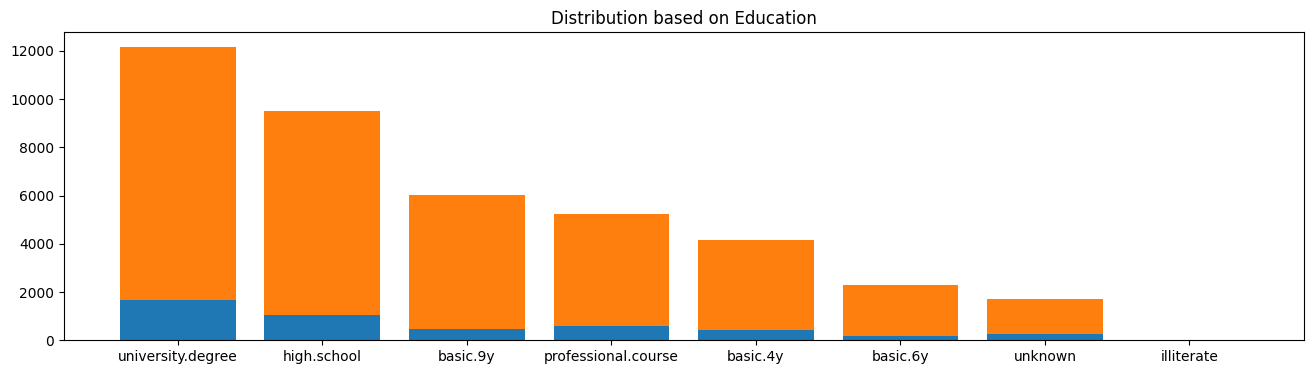

In [685]:
edu_counts = df['education'].value_counts()
categories = edu_counts.index.tolist()
plt.figure(figsize=(16, 4))
positive_counts = df.loc[df['target'] == 1, 'education'].value_counts()
positive_values = [positive_counts.get(category, 0) for category in categories]
negative_counts = df.loc[df['target'] == 0, 'education'].value_counts()
negative_values = [negative_counts.get(category, 0) for category in categories]
plt.bar(categories, positive_values, label='Yes')
plt.bar(categories, negative_values, bottom=positive_values)
plt.title('Distribution based on Education')
plt.show()

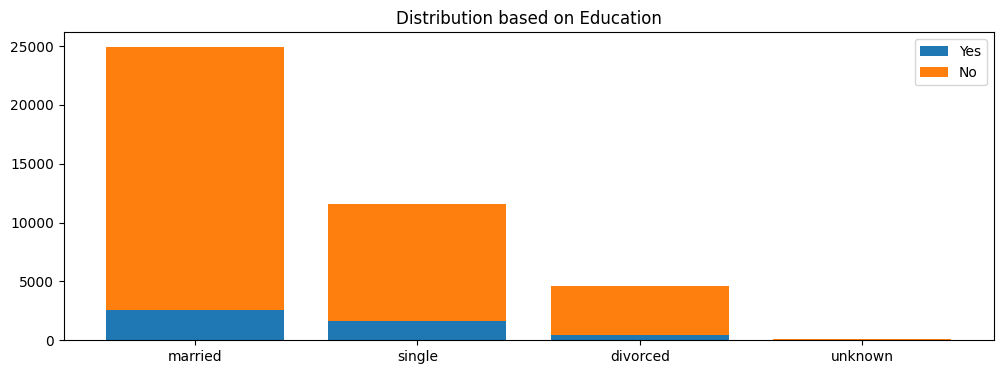

In [686]:
marital_counts = df['marital'].value_counts()
categories = marital_counts.index.tolist()
plt.figure(figsize=(12, 4))
positive_counts = df.loc[df['target'] == 1, 'marital'].value_counts()
positive_values = [positive_counts.get(category, 0) for category in categories]
negative_counts = df.loc[df['target'] == 0, 'marital'].value_counts()
negative_values = [negative_counts.get(category, 0) for category in categories]
plt.bar(categories, positive_values, label='Yes')
plt.bar(categories, negative_values, bottom=positive_values, label='No')
plt.title('Distribution based on Education')
plt.legend()
plt.show()

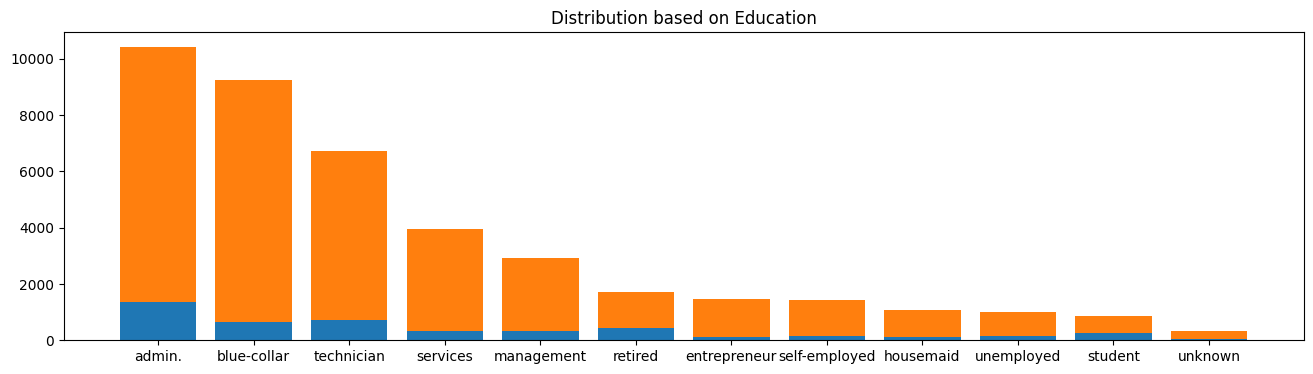

In [687]:
job_counts = df['job'].value_counts()
categories = job_counts.index.tolist()
plt.figure(figsize=(16, 4))
positive_counts = df.loc[df['target'] == 1, 'job'].value_counts()
positive_values = [positive_counts.get(category, 0) for category in categories]
negative_counts = df.loc[df['target'] == 0, 'job'].value_counts()
negative_values = [negative_counts.get(category, 0) for category in categories]
plt.bar(categories, positive_values, label='Yes')
plt.bar(categories, negative_values, bottom=positive_values, label='No')
plt.title('Distribution based on Education')
plt.show()

Numerical Features

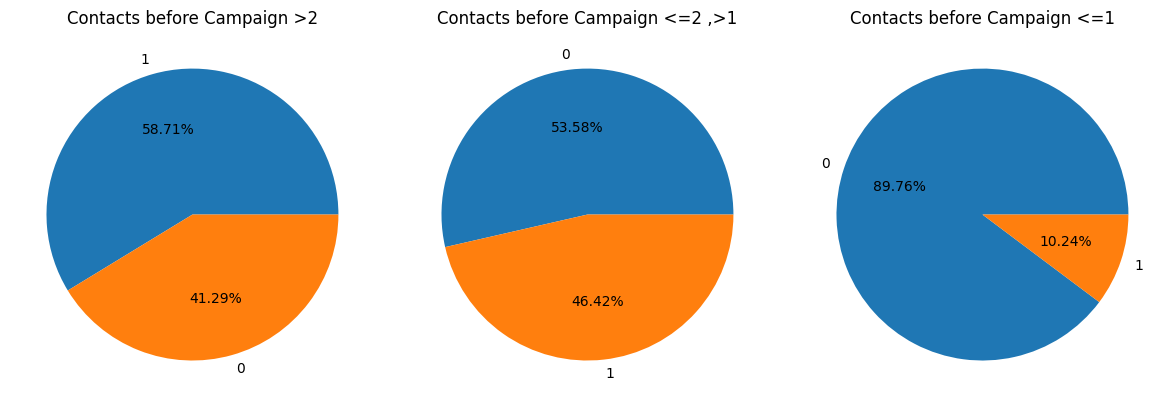

In [688]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
c1 = df.loc[(df['previous'] > 2), 'target'].value_counts()
c2 = df.loc[(df['previous'] <= 2) & (df['previous'] > 1), 'target'].value_counts()
c3 = df.loc[(df['previous'] <= 1) & (df['previous'] >= 0), 'target'].value_counts()
axes[0].pie(c1, labels=c1.index, autopct='%1.2f%%')
axes[0].set_title('Contacts before Campaign >2')
axes[1].pie(c2, labels=c2.index, autopct='%1.2f%%')
axes[1].set_title('Contacts before Campaign <=2 ,>1')
axes[2].pie(c3, labels=c3.index, autopct='%1.2f%%')
axes[2].set_title('Contacts before Campaign <=1')
plt.tight_layout()
plt.show()

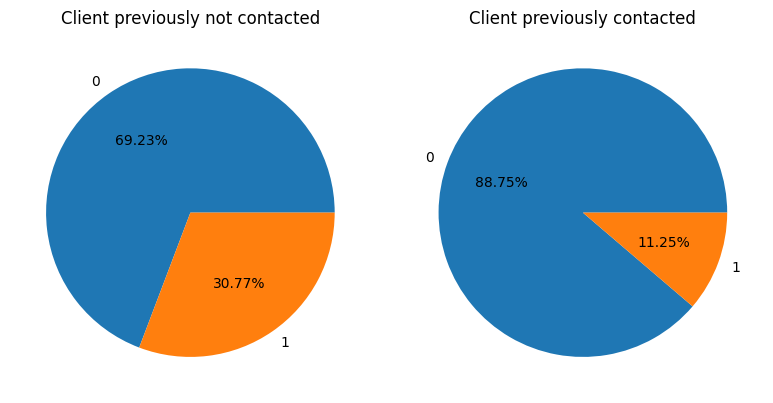

In [689]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
d1 = df.loc[(df['pdays'] == 1) , 'target'].value_counts()
d2 = df.loc[(df['pdays'] != 1) , 'target'].value_counts()
axes[0].pie(d1, labels=d1.index, autopct='%1.2f%%')
axes[0].set_title('Client previously not contacted')
axes[1].pie(d2, labels=d2.index, autopct='%1.2f%%')
axes[1].set_title('Client previously contacted')
plt.tight_layout()
plt.show()

**Imbalanced dataset**

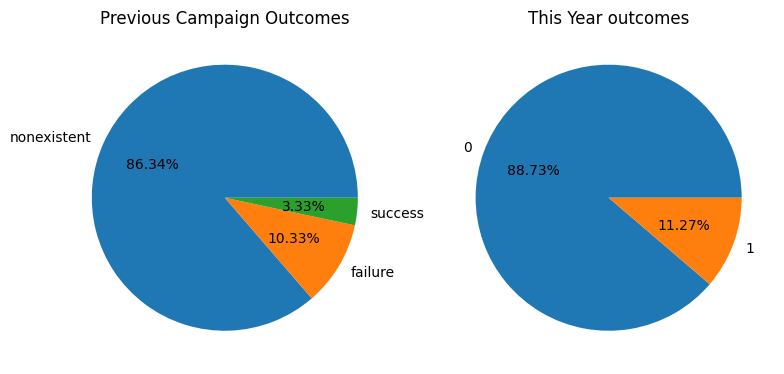

In [690]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
label_counts = df['target'].value_counts()
out_counts = df['poutcome'].value_counts()
axes[0].pie(out_counts, labels=out_counts.index, autopct='%1.2f%%')
axes[0].set_title('Previous Campaign Outcomes')
axes[1].pie(label_counts, labels=label_counts.index, autopct='%1.2f%%')
axes[1].set_title('This Year outcomes')
plt.tight_layout()
plt.show()

# Model Implementation

Split data into 80% and 20%.

In [691]:
features = data
target = df['target']

In [692]:
x_train,x_test,y_train,y_test = train_test_split(features,target, test_size=0.2, random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(32940, 59) (8236, 59) (32940,) (8236,)


i). Linear Models : Logistic Regression

In [693]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [694]:
class_counts = y_train.value_counts()
y_train = np.array(y_train)
y_train = np.ravel(y_train)

In [695]:

class_weights = {0: (round(1 - ((class_counts[0] / (class_counts[1]*10))),2)), 1: round((class_counts[0] / (class_counts[1]*10)),2)}
model = LogisticRegression(random_state=42, class_weight=class_weights, max_iter=1500)
model.fit(x_train, y_train)

model_1 = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1500)
model_1.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1500, random_state=42)

Type 1 :  **Linear model with assigned class weights**
- High Accuracy and Low Recall
- Helps in predicting true positive and true negative but might miss some positive cases.

In [696]:
num_iterations = 5
for iteration in range(num_iterations):
    model.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(x_test)

    # Calculate and store recall score
    recall = recall_score(y_test, y_pred)
    print(f"Iteration {iteration + 1} - Recall: {recall:.4f}")

# Evaluate the final model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Final Model - Accuracy:", accuracy)
print("\nFinal Model - Classification Report:\n", report)
print("\nFinal Model - Confusion Matrix:\n", confusion)


Iteration 1 - Recall: 0.7096
Iteration 2 - Recall: 0.7096
Iteration 3 - Recall: 0.7096
Iteration 4 - Recall: 0.7096
Iteration 5 - Recall: 0.7096
Final Model - Accuracy: 0.889752306945119

Final Model - Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      7265
           1       0.52      0.71      0.60       971

    accuracy                           0.89      8236
   macro avg       0.74      0.81      0.77      8236
weighted avg       0.91      0.89      0.90      8236


Final Model - Confusion Matrix:
 [[6639  626]
 [ 282  689]]


**Type 2: Linear model with assign weights**
- Low Accuracy and High recall (comparing accuracy and recall with the above model)
- Helps in predicting more false positive values which reduces the chances of losing even a vital subscriber.

In [697]:
num_iterations = 5


for iteration in range(num_iterations):
    model_1.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred_1 = model_1.predict(x_test)

    # Calculate and store recall score
    recall_1 = recall_score(y_test, y_pred_1)

    print(f"Iteration {iteration + 1} - Recall: {recall_1:.4f}")

# Evaluate the final model
y_pred_1 = model_1.predict(x_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
report_1 = classification_report(y_test, y_pred_1)
confusion_1 = confusion_matrix(y_test, y_pred_1)

print("Final Model - Accuracy:", accuracy_1)
print("\nFinal Model - Classification Report:\n", report_1)
print("\nFinal Model - Confusion Matrix:\n", confusion_1)

Iteration 1 - Recall: 0.8486
Iteration 2 - Recall: 0.8486
Iteration 3 - Recall: 0.8486
Iteration 4 - Recall: 0.8486
Iteration 5 - Recall: 0.8486
Final Model - Accuracy: 0.861947547353084

Final Model - Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      7265
           1       0.45      0.85      0.59       971

    accuracy                           0.86      8236
   macro avg       0.72      0.86      0.75      8236
weighted avg       0.92      0.86      0.88      8236


Final Model - Confusion Matrix:
 [[6275  990]
 [ 147  824]]


**ii). Ensemble Model : Random Forest**

In [698]:
from sklearn.ensemble import RandomForestClassifier

Type 1: RF assigned without class weigths
- Performs poorly compare to Linear model.
- Accuracy is higher compare to linear model
- Overall, F1 score and recall values are poor and no prediction is feasible.

In [699]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
report_rf = classification_report(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

#cross validation
scoring_metrics = ['accuracy', 'recall', 'f1']
cv_results = cross_validate(rf_classifier, x_train, y_train, cv=5, scoring=scoring_metrics)
accuracy_scores = cv_results['test_accuracy']
recall_scores = cv_results['test_recall']
recall_scores= cv_results['test_recall']
F1_scores= cv_results['test_f1']


print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Mean CV Accuracy:", np.mean(accuracy_scores))
print("Cross-Validation Recall Scores:", recall_scores)
print("Mean CV Recall:", np.mean(recall_scores))
print("\nFinal Model - Classification Report:\n", report_rf)
print("\nFinal Model - Confusion Matrix:\n", confusion_rf)

Cross-Validation Accuracy Scores: [0.91105039 0.9108986  0.91029144 0.90892532 0.90680024]
Mean CV Accuracy: 0.9095931997571342
Cross-Validation Recall Scores: [0.41746248 0.42837653 0.41553134 0.40463215 0.41416894]
Mean CV Recall: 0.41603428856069086

Final Model - Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7265
           1       0.64      0.41      0.50       971

    accuracy                           0.90      8236
   macro avg       0.78      0.69      0.72      8236
weighted avg       0.89      0.90      0.89      8236


Final Model - Confusion Matrix:
 [[7038  227]
 [ 569  402]]


Type 2: RF assigned with class weigths
- Performs poorly compare to Linear model.
- Accuracy is higher compare to linear model
- Overall, F1 score and recall values are slightly increasing but it has been worst while comparing with linear model

In [700]:
class_weights = {0: 1, 1: 2}
rf_classifier_1 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
rf_classifier_1.fit(x_train, y_train)
y_pred_rf_1 = rf_classifier.predict(x_test)
report_rf_1 = classification_report(y_test, y_pred_rf_1)
confusion_rf_1 = confusion_matrix(y_test, y_pred_rf_1)

#cross validation
scoring_metrics = ['accuracy', 'recall', 'f1']
cv_results_1 = cross_validate(rf_classifier_1, x_train, y_train, cv=5, scoring=scoring_metrics)
accuracy_scores_1 = cv_results_1['test_accuracy']
recall_scores_1 = cv_results_1['test_recall']
F1_scores_1 = cv_results_1['test_f1']

print("Cross-Validation Accuracy Scores:", accuracy_scores_1)
print("Mean CV Accuracy:", np.mean(accuracy_scores_1))
print("Cross-Validation Recall Scores:", recall_scores_1)
print("Mean CV Recall:", np.mean(recall_scores_1))
print("\nFinal Model - Classification Report:\n", report_rf_1)
print("\nFinal Model - Confusion Matrix:\n", confusion_rf_1)


Cross-Validation Accuracy Scores: [0.91393443 0.90938069 0.91256831 0.90862174 0.90846995]
Mean CV Accuracy: 0.910595021250759
Cross-Validation Recall Scores: [0.45429741 0.44611187 0.44959128 0.44822888 0.44414169]
Mean CV Recall: 0.44847422596102016

Final Model - Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7265
           1       0.64      0.41      0.50       971

    accuracy                           0.90      8236
   macro avg       0.78      0.69      0.72      8236
weighted avg       0.89      0.90      0.89      8236


Final Model - Confusion Matrix:
 [[7038  227]
 [ 569  402]]


**iii). Stacking : Light gradient boosting**

In [701]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from lightgbm import LGBMClassifier

In [702]:
model1 = LGBMClassifier()
undersampling_ratio = 0.5
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
scores = []
recalls = []
precisions = []
labels = np.ravel(target)

for train_index, test_index in kf.split(features, labels):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    undersampler = RandomUnderSampler(sampling_strategy=undersampling_ratio, random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(features, labels)
    model1.fit(X_resampled, y_resampled)
    y_pred = model1.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recalle = recall_score(y_test,y_pred)
    precisione = precision_score(y_test, y_pred)
    scores.append(accuracy)
    recalls.append(recalle)
    precisions.append(precisione)

    confusion = confusion_matrix(y_test, y_pred)
    classification = classification_report(y_test, y_pred)

    print("Confusion Matrix:")
    print(confusion)
    print("\nClassification Report:")
    print(classification)

mean_accuracy = np.mean(scores)
print("Mean Accuracy:", mean_accuracy)
recall_score = np.mean(recalls)
print("Mean recall score:", recall_score)
precision_score = np.mean(precisions)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4639, number of negative: 9278
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 482
[LightGBM] [Info] Number of data points in the train set: 13917, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
Confusion Matrix:
[[6550  758]
 [  75  853]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      7308
           1       0.53      0.92      0.67       928

    accuracy                           0.90      8236
   macro avg       0.76      0.91      0.81      8236
weighted avg       0.

The Linear Model and Light Gradient model are more relient and predictive for analyzing people behaviour on whether they will subscibe for the product or not?
However, LGB is more effecient and effective in recommending the behaviour of people as the accuracy and Recall has been high and significant.